In [475]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

train_df = pd.read_csv('train.csv',delimiter=',')
test_df = pd.read_csv('test.csv',delimiter=',')

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [476]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Emanuel, Miss. Virginia Ethel",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [477]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


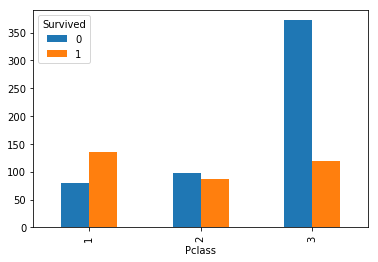

In [478]:
train_df.pivot_table('PassengerId','Pclass', 'Survived', 'count').plot(kind='bar')

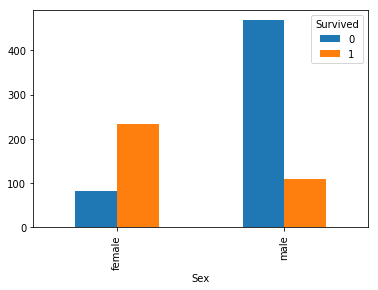

In [479]:
train_df.pivot_table('PassengerId','Sex', 'Survived', 'count').plot(kind='bar')

In [480]:
ps = train_df[['Pclass','Survived']]
ps.groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [481]:
ss = train_df[['Sex','Survived']]
ss.groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [482]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()#.sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [483]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeBand        177
dtype: int64

In [484]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [485]:
combine = [train_df, test_df]

In [486]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [487]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeBand        177
dtype: int64

In [488]:
combine = [train_df, test_df]

In [489]:
le = LabelEncoder()
for dataset in combine:
    dataset['Sex'] = le.fit_transform(dataset['Sex'].values)


In [490]:
Enc_label = LabelEncoder()
for dataset in combine:
    dataset['Embarked'] = Enc_label.fit_transform(dataset['Embarked'].values)


In [491]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,"(32.252, 48.168]"


In [492]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [493]:
Enc_ohe = OneHotEncoder(categorical_features=[0])

train_matrix = Enc_ohe.fit_transform(train_df[['Embarked']]).todense()
train_matrix

matrix([[ 0.,  0.,  1.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  1.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]])

In [494]:
test_matrix = Enc_ohe.fit_transform(test_df[['Embarked']]).todense()
train_matrix

matrix([[ 0.,  0.,  1.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  1.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]])

In [495]:
labels = ['Cherbourg','Queenstown','Southampton']
train_embarked = pd.DataFrame(data=train_matrix, columns=labels)
test_embarked = pd.DataFrame(data=test_matrix, columns=labels)

train_embarked.head()

,Cherbourg,Queenstown,Southampton
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [496]:
freq_age = train_df.Age.dropna().mode()[0]
freq_age

24.0

In [497]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(freq_age)

In [498]:
train_df = train_df.drop(['Ticket', 'Cabin','PassengerId','Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','PassengerId','Name'], axis=1)
combine = [train_df, test_df]

In [499]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
AgeBand     177
dtype: int64

In [500]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [501]:
combine = [train_df, test_df]
for dataset in combine:
    dataset.loc[ dataset['Age'] <=  16.336, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16.336) & (dataset['Age'] <= 32.252), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32.252) & (dataset['Age'] <=  48.168), 'Age']   = 2
    dataset.loc[(dataset['Age'] > 48.168) & (dataset['Age'] <=  64.084), 'Age']   = 3
    dataset.loc[ dataset['Age'] > 64.084, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

In [502]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,2
1,1,1,0,2,1,0,71.2833,0
2,1,3,0,1,0,0,7.9250,2
3,1,1,0,2,1,0,53.1000,2
4,0,3,1,2,0,0,8.0500,2


In [503]:
test_df = test_df.dropna(axis=1, how='any')

In [504]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [505]:
train_df = pd.concat([train_df, train_embarked], axis=1)
test_df = pd.concat([test_df, train_embarked], axis=1)

train_df =  train_df.drop(['Embarked', 'Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Embarked','Parch', 'SibSp'], axis=1)

In [506]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cherbourg,Queenstown,Southampton
0,0,3,1,1,7.2500,0.0,0.0,1.0
1,1,1,0,2,71.2833,1.0,0.0,0.0
2,1,3,0,1,7.9250,0.0,0.0,1.0
3,1,1,0,2,53.1000,0.0,0.0,1.0
4,0,3,1,2,8.0500,0.0,0.0,1.0


In [507]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

In [508]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cherbourg,Queenstown,Southampton
0,0,3,1,1,7.2500,0.0,0.0,1.0
1,1,1,0,2,71.2833,1.0,0.0,0.0
2,1,3,0,1,7.9250,0.0,0.0,1.0
3,1,1,0,2,53.1000,0.0,0.0,1.0
4,0,3,1,2,8.0500,0.0,0.0,1.0


In [509]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
acc_svc = svc.score(X_train, y_train)
acc_svc

0.83052749719416386

In [510]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
acc_knn = knn.score(X_train, y_train)
acc_knn

0.856341189674523

In [511]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine',
              'KNeighborsClassifier'
        
    ],
    'Score': [
        acc_svc, acc_knn
    ]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNeighborsClassifier,0.856341
0,Support Vector Machine,0.830527
